## Importing Necessary Libraries and data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('C:/Users/Mohan/Downloads/StudentsPerformance.csv')
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group C,some high school,free/reduced,none,0,17,10
1,female,group B,high school,free/reduced,none,8,24,23
2,female,group B,some high school,free/reduced,none,18,32,28
3,female,group B,some college,standard,none,11,38,32
4,female,group C,some college,free/reduced,none,22,39,33


In [3]:
#Show the shape of the dataset
data.shape

(1000, 8)

In [4]:
# Check statistics of data set
data.describe()

,math score,reading score,writing score
count,1000.000000,1000.000000,1000.000000
mean,66.001000,69.195000,68.119000
std,15.569567,14.706436,15.226381
min,0.000000,17.000000,10.000000
25%,57.000000,59.000000,58.000000
50%,66.000000,70.000000,69.000000
75%,77.000000,79.250000,79.000000
max,100.000000,100.000000,100.000000


In [5]:
#To Check if any features has null values in it
data.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [6]:
#To Check datatypes of each features
data.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [7]:
#Check the number of unique values of each column
data.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     85
reading score                  72
writing score                  77
dtype: int64

### 1. Find out how many males and females participated in the test.

In [8]:
data['gender'].value_counts()

female    518
male      482
Name: gender, dtype: int64

#### Remarks: 518 females and 482 males participated in test

### 2. What do you think about the students' parental level of education?

In [9]:
data['parental level of education'].value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

#### Remarks: 
      1. 226 parents have college education.

      2. out of 226, 118 have bachelors degree
         and 59 have masters degree
      3. 196 attended till high school

In [10]:
# Creating 2 new features ,Total Score(sum of 3 score features) and Average score

In [11]:
data['Total'] = data['math score'] + data['reading score'] + data['writing score']
data['Average'] = data['Total']/3

In [12]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total,Average
0,female,group C,some high school,free/reduced,none,0,17,10,27,9.000000
1,female,group B,high school,free/reduced,none,8,24,23,55,18.333333
2,female,group B,some high school,free/reduced,none,18,32,28,78,26.000000
3,female,group B,some college,standard,none,11,38,32,81,27.000000
4,female,group C,some college,free/reduced,none,22,39,33,94,31.333333


<AxesSubplot:xlabel='gender', ylabel='Average'>

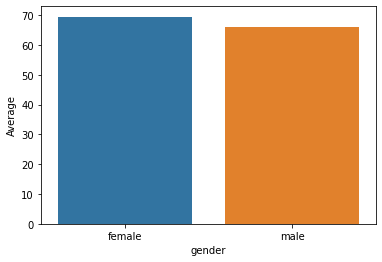

In [13]:
sns.barplot( x='gender', y='Average', data=data,  ci=None)

#### On average female students performed better

### 3. Who scores the most on average for math, reading and writing based on
       ● Gender
       ● Test preparation course

In [14]:
df = data[['gender', 'math score', 'reading score', 'writing score']].groupby('gender').mean()
df

,math score,reading score,writing score
gender,,,
female,63.376448,72.590734,72.467181
male,68.821577,65.545643,63.446058


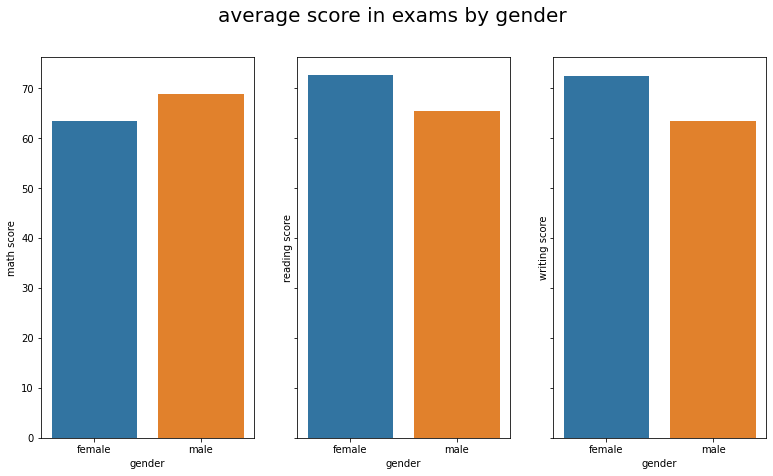

In [15]:
fig, axes=plt.subplots(1, 3,sharey=True, figsize=(13,7))
sns.barplot(ax=axes[0], x='gender', y='math score', data=data,  ci=None)
sns.barplot(ax=axes[1], x='gender', y='reading score', data=data, ci=None)
sns.barplot(ax=axes[2], x='gender', y='writing score', data=data, ci=None)
fig.suptitle('average score in exams by gender', fontsize=20)
plt.show()

#### Remarks:The male students performed better in the math exams while the female students performed better in the reading and writing exams.

In [16]:
df1= data[['test preparation course', 'math score', 'reading score', 'writing score']].groupby('test preparation course').mean()
df1

,math score,reading score,writing score
test preparation course,,,
completed,69.96648,74.175978,74.684358
none,63.78972,66.417445,64.457944


Text(0.5, 0.98, 'score in exams by gender as affected by test preparation course ')

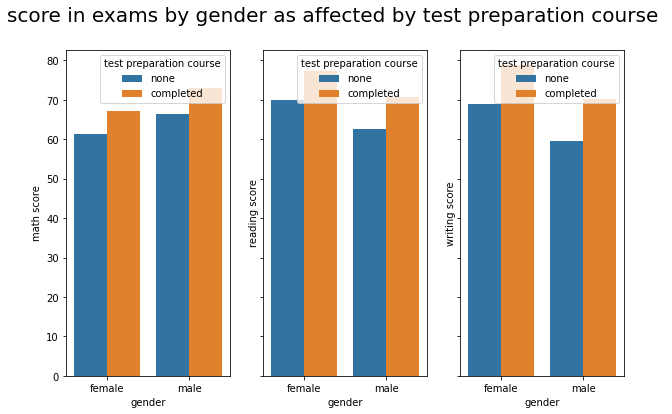

In [17]:
fig, axes=plt.subplots(1, 3,sharey=True, figsize=(10,6))
sns.barplot(ax=axes[0], x='gender', y='math score', data=data, hue='test preparation course', ci=None)
sns.barplot(ax=axes[1], x='gender', y='reading score', data=data,hue='test preparation course', ci=None)
sns.barplot(ax=axes[2], x='gender', y='writing score', data=data,hue='test preparation course', ci=None)
fig.suptitle('score in exams by gender as affected by test preparation course ',fontsize=20)

#### It appears that in the three exams, students who completed the test preparation performed better than those who did not.

### 4. What do you think about the scoring variation for math, reading and writing based on
       ● Gender
       ● Test preparation course

In [18]:
var_gen = data[['gender', 'math score', 'reading score', 'writing score']].groupby('gender').var()
var_gen

,math score,reading score,writing score
gender,,,
female,256.958593,207.677438,220.369327
male,211.889097,200.211010,202.413924


In [19]:
var_test = data[['test preparation course', 'math score',
                 'reading score', 'writing score']].groupby('test preparation course').var()
var_test

,math score,reading score,writing score
test preparation course,,,
completed,210.884027,183.265864,175.202612
none,246.668662,213.419851,226.251739


### 5. The management needs your help to give bonus points to the top 25% of students based on their math score, so how will you help the management to achieve this.

In [20]:
data.nlargest(250, ['math score'])      #25% oftotal students i.e., 1000 is 250

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total,Average
515,female,group E,some college,standard,none,100,92,97,289,96.333333
516,female,group E,bachelor's degree,standard,none,100,100,100,300,100.000000
517,female,group E,associate's degree,standard,none,100,100,100,300,100.000000
996,male,group A,some college,standard,completed,100,96,86,282,94.000000
997,male,group D,some college,standard,completed,100,97,99,296,98.666667
...,...,...,...,...,...,...,...,...,...,...
428,female,group D,some college,free/reduced,none,77,86,86,249,83.000000
429,female,group E,some high school,standard,none,77,79,80,236,78.666667
849,male,group A,bachelor's degree,standard,none,77,67,68,212,70.666667
850,male,group C,associate's degree,free/reduced,none,77,67,64,208,69.333333
